# Two Sample T-Test - Lab

## Introduction

The two sample t-test is used to determine if two population means are equal. A common application is to test if a new process or treatment is superior to a current process or treatment.

## Objectives

You will be able to:

* Perform a two-sample t-test and make conclusions about an experiment based on the results
* Visually represent the t-test and p-value using the t-distribution

## Example: 

Consider the following experimental settings for clinical trials of a new blood pressure medicine. 

In the context of controlled experiments, you will often see talk about the "control" group and the "experimental" or "treatment" group. In a drug test example, the control group is the group given the placebo and the treatment group is given the actual drug. Researchers are interested in the average difference in blood pressure levels between the treatment and control groups.

>The 50 subjects in the control group have an average systolic blood pressure of 121.38 who have been given a placebo drug.

>The 50 subjects in the experimental / treatment group have an average systolic blood pressure of 111.56 after treatment with the drug being tested. 

The apparent difference between experimental and control groups is -9.82 points. But with 50 subjects in each group, how confident can a researcher be that this measured difference is real? You can perform a two sample t-test to evaluate this.

First, you will calculate a t-statistic for a 2-sample t-test, then calculate a p-value. 

The experimental and control observations are given below as NumPy arrays. 

First, let's make sure to import necessary libraries:

In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Use this sample data to conduct experimentation

control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])


It is always a good idea to create a plot of the probability distributions for samples to visually inspect the differences present between mean and standard deviation. Plot both samples' distributions and inspect the overlap using `seaborn` to get an idea of how different the samples might be from one another. 

Original Sample Results:
{'sample_mean': 81.80000000000001, 'sample_std': 5.9216818379134235, 't_value': 12.687592157174493, 'p_value': 1.0053355594452825e-10, 'reject_null': True}
Corrected Sample Results:
{'sample_mean': 81.30000000000001, 'sample_std': 5.521536780738914, 't_value': 13.202088288314906, 'p_value': 5.083361606682268e-11, 'reject_null': True}


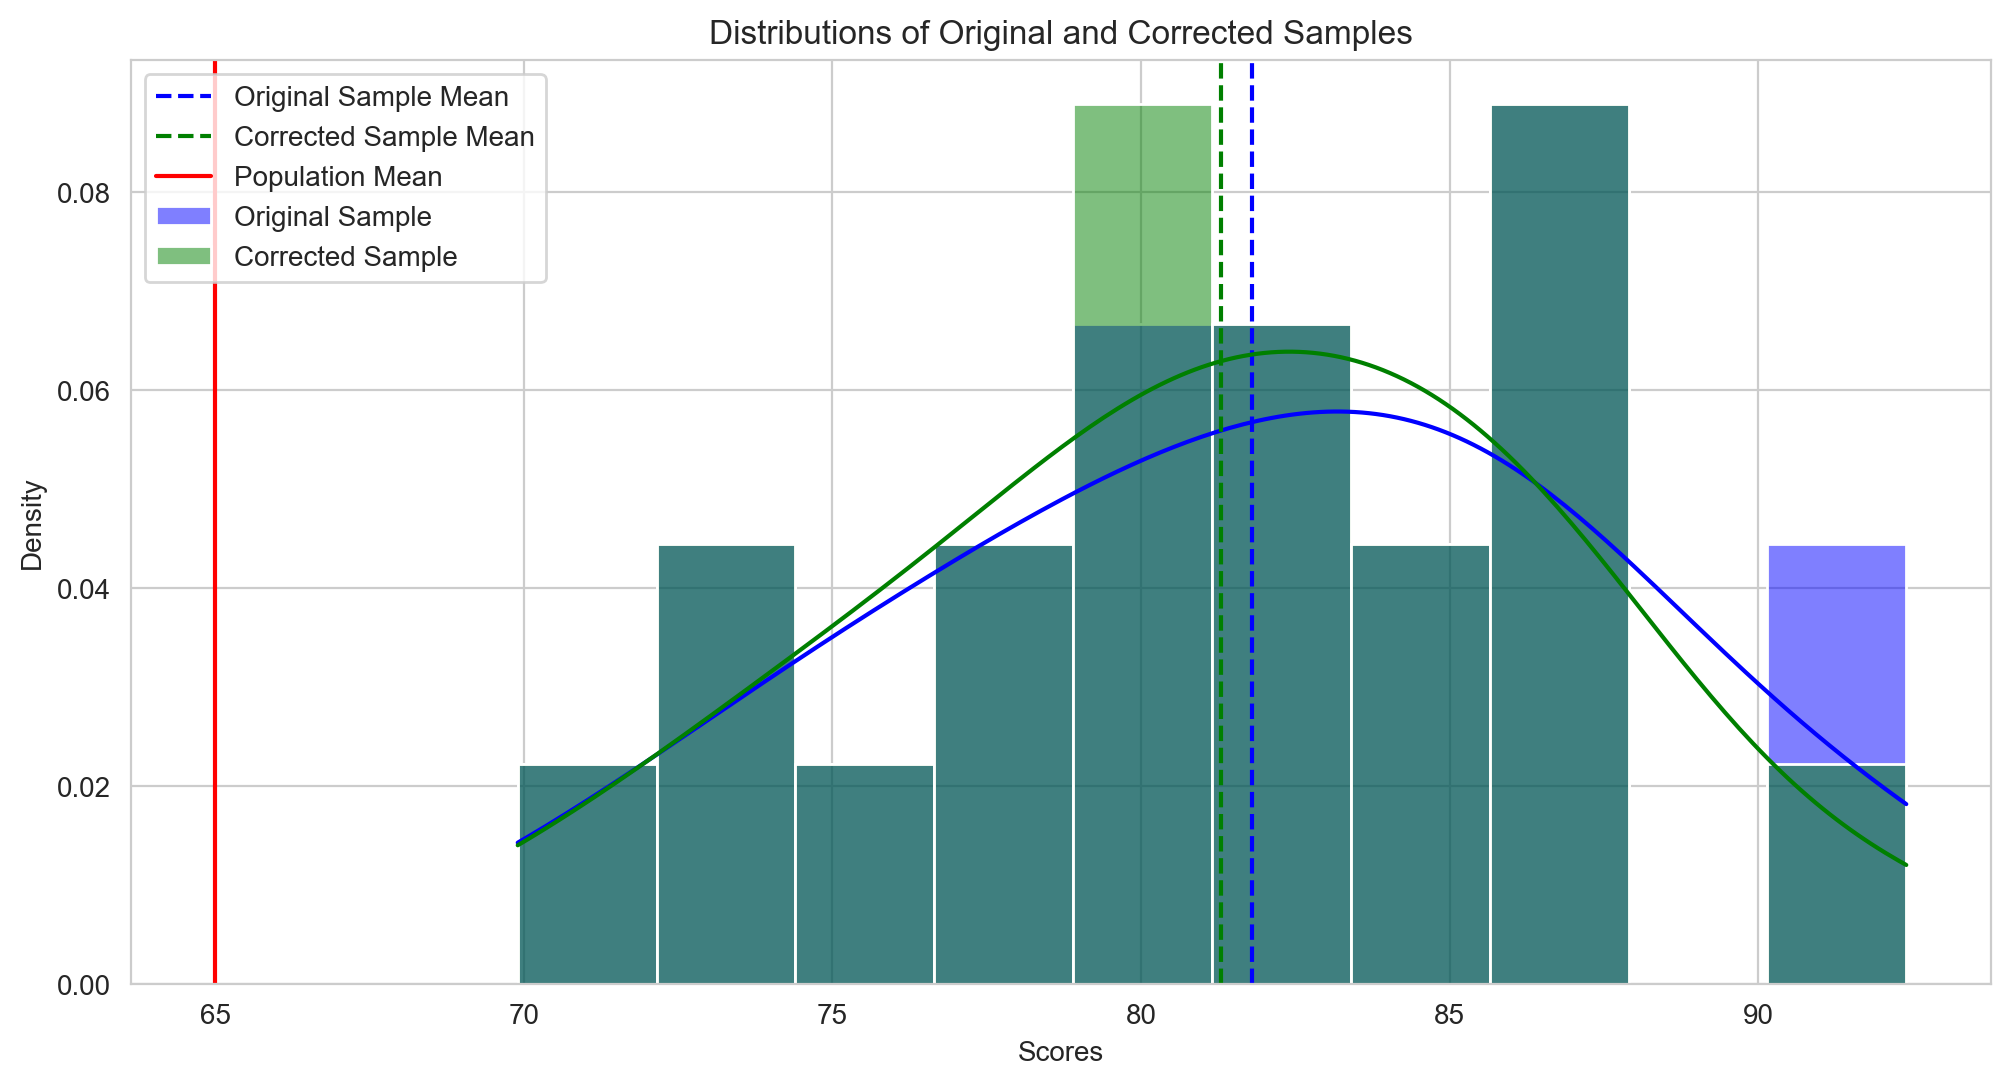

In [3]:
# Create a plot showing overlapping of distribution means and sds for inspection
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def one_sample_ttest(sample, popmean, alpha):
    """
    Parameters
    ----------
    sample: ndarray
        A random sample from the population
    popmean: float
        The population mean
    alpha: float
        The significance level
    
    Returns
    ----------
    results : dict
        A dictionary containing the sample mean, sample standard deviation, t-value, p-value, and whether the null hypothesis is rejected
    """
    # Population mean
    population_mean = popmean

    # Sample mean (x̄) using NumPy mean()
    sample_mean = np.mean(sample)

    # Sample Standard Deviation (sigma) using NumPy
    sample_std = np.std(sample, ddof=1)  # ddof=1 to get the sample standard deviation

    # Degrees of freedom
    degrees_of_freedom = len(sample) - 1

    # Calculate the critical t-value
    critical_t = stats.t.ppf(1 - alpha/2, degrees_of_freedom)

    # Calculate the t-value and p-value
    t_value, p_value = stats.ttest_1samp(sample, population_mean)

    # Determine if the null hypothesis is rejected
    reject_null = p_value < alpha

    # Return results
    results = {
        'sample_mean': sample_mean,
        'sample_std': sample_std,
        't_value': t_value,
        'p_value': p_value,
        'reject_null': reject_null
    }
    return results

# Original sample scores
sample_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
                 78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

# Corrected sample scores (correcting 90.9 to 80.9)
corrected_sample_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
                           78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

# Population mean before the test
popmean = 65

# Significance level
alpha = 0.05

# Test the original sample
original_results = one_sample_ttest(sample_scores, popmean, alpha)
print("Original Sample Results:")
print(original_results)

# Test the corrected sample
corrected_results = one_sample_ttest(corrected_sample_scores, popmean, alpha)
print("Corrected Sample Results:")
print(corrected_results)

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Plot original sample distribution
sns.histplot(sample_scores, kde=True, color='blue', label='Original Sample', stat='density', bins=10)
plt.axvline(np.mean(sample_scores), color='blue', linestyle='--', label='Original Sample Mean')

# Plot corrected sample distribution
sns.histplot(corrected_sample_scores, kde=True, color='green', label='Corrected Sample', stat='density', bins=10)
plt.axvline(np.mean(corrected_sample_scores), color='green', linestyle='--', label='Corrected Sample Mean')

# Plot population mean
plt.axvline(popmean, color='red', linestyle='-', label='Population Mean')

plt.title('Distributions of Original and Corrected Samples')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.legend()
plt.show()


There are some slight differences between the mean and standard deviation of the control and experimental groups. This is a good sign to further our experimentation and to calculate whether the difference is significant, or not. As a reminder the five steps to performing a hypothesis test are:

1) Set up null and alternative hypotheses   
2) Choose a significance level   
3) Calculate the test statistic   
4) Determine the critical or p-value (find the rejection region)   
5) Compare t-value with critical t-value to reject or fail to reject the null hypothesis   

## The Null Hypothesis

In thus drug efficacy experiment example, you can define the null hypothesis to be that there is no difference between a subject taking a placebo and the treatment drug.

>**$H_{0}$: The mean difference between treatment and control groups is zero. i.e. $\mu_{0} = \mu_{1}$**

## The Alternate Hypothesis

In this example, the alternative hypothesis is that there is in fact a mean difference in blood pressure between the treatment and control groups.

>**$H_{1}$ (2-tailed): The parameter of interest, our mean difference between treatment and control, is different than zero.**

>**$H_{1}$ (1-tailed, >): The parameter of interest, our mean difference between treatment and control, is greater than zero.**

>**$H_{1}$ (1-tailed, <): The parameter of interest, our mean difference between treatment and control, is less than zero.**

NOTE: The null hypothesis and alternative hypothesis are concerned with the true values, or in other words the parameter of the overall population. Through the process of experimentation/hypothesis testing and statistical analysis of the results, we will make an inference about this population parameter.

Now, calculate the mean difference between both groups.

In [4]:
# -9.819999999999993

# Calculate the means of both groups
control_mean = np.mean(control)
experimental_mean = np.mean(experimental)

# Calculate the mean difference
mean_difference = control_mean - experimental_mean

print(f"Control Group Mean: {control_mean}")
print(f"Experimental Group Mean: {experimental_mean}")
print(f"Mean Difference: {mean_difference}")

Control Group Mean: 121.38
Experimental Group Mean: 111.56
Mean Difference: 9.819999999999993


What is the probability that you would observe this data GIVEN a specified mean difference in blood pressure?

You obviously don't know the true mean difference in blood pressure resulting from administration of the drug. The whole point of conducting the experiment is to evaluate the drug. Instead, you must assume that the true mean difference is zero: the null hypothesis $H_{0}$ is assumed to be true:

## Calculating the t-statistic
When comparing the difference between groups, we can calculate the two-sample t-statistic like so:

$$\large t = \frac{\bar{x}_{1} - \bar{x}_{2}}{\sqrt{s^{2}_{p} (\frac{1}{n_{1}} + \frac{1}{n_{2}}) }    }  $$

Where $s^{2}_{p}$ is the pooled sample variance, calculated as:

$$\large s^{2}_{p}  = \frac{(n_{1} -1)s^{2}_{1} +  (n_{2} -1)s^{2}_{2}}{n_{1} + n_{2} - 2}  $$

Where $s^{2}_{1}$ and $s^{2}_{2}$ are the variances for each sample given by the formula 
$$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $$


## Calculating pooled sample variance
The $s^2_{p}$ denotes the sample variance. In this version of the t-test, you are assuming equal variances in our experimental and control groups in the overall population. There is another way to calculate the t-test where equal variance is not assumed, but in this case, it is a reasonable assumption.

This approach combines the variance of the two group's variance measurements into a single, pooled metric.

Now, create some functions to calculate the t-statistic. The first function to create is one that calculates the variance for a single sample.

In [6]:
def sample_variance(sample):
    """
    Calculate the sample variance.

    Parameters
    ----------
    sample: ndarray
        A random sample from the population
    
    Returns
    ----------
    variance : float
        The sample variance
    """
    # Calculate the mean of the sample
    sample_mean = np.mean(sample)
    
    # Subtract the mean from each sample value and square the result
    squared_diffs = (sample - sample_mean) ** 2
    
    # Sum all the squared results
    sum_squared_diffs = np.sum(squared_diffs)
    
    # Divide the sum by the number of sample values minus one (degrees of freedom)
    variance = sum_squared_diffs / (len(sample) - 1)
    
    return variance

# Test the function
sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
                   78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

variance = sample_variance(sample)
print(f"Sample Variance: {variance}")

Sample Variance: 35.0663157894737


Using `sample_variance`, you can now write another function `pooled_variance` to calculate $s_{p}^{2}$

In [7]:
def sample_variance(sample):
    """
    Calculate the sample variance.

    Parameters
    ----------
    sample: ndarray
        A random sample from the population
    
    Returns
    ----------
    variance : float
        The sample variance
    """
    # Calculate the mean of the sample
    sample_mean = np.mean(sample)
    
    # Subtract the mean from each sample value and square the result
    squared_diffs = (sample - sample_mean) ** 2
    
    # Sum all the squared results
    sum_squared_diffs = np.sum(squared_diffs)
    
    # Divide the sum by the number of sample values minus one (degrees of freedom)
    variance = sum_squared_diffs / (len(sample) - 1)
    
    return variance

def pooled_variance(sample1, sample2):
    """
    Calculate the pooled variance of two samples.

    Parameters
    ----------
    sample1: ndarray
        The first sample
    sample2: ndarray
        The second sample
    
    Returns
    ----------
    pooled_var : float
        The pooled variance
    """
    # Calculate the variances of the two samples
    var1 = sample_variance(sample1)
    var2 = sample_variance(sample2)
    
    # Calculate the degrees of freedom for each sample
    n1 = len(sample1)
    n2 = len(sample2)
    
    # Calculate the pooled variance using the formula
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    
    return pooled_var

# Test the function
sample1 = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

sample2 = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                     101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                     97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                     116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])

pooled_var = pooled_variance(sample1, sample2)
print(f"Pooled Variance: {pooled_var}")


Pooled Variance: 673.7969387755102


Now that you have $s_{p}^{2}$, create a function `twosample_tstatistic` to calculate the two sample t-statistic using the formula given earlier. 

In [8]:
def sample_variance(sample):
    """
    Calculate the sample variance.

    Parameters
    ----------
    sample: ndarray
        A random sample from the population
    
    Returns
    ----------
    variance : float
        The sample variance
    """
    # Calculate the mean of the sample
    sample_mean = np.mean(sample)
    
    # Subtract the mean from each sample value and square the result
    squared_diffs = (sample - sample_mean) ** 2
    
    # Sum all the squared results
    sum_squared_diffs = np.sum(squared_diffs)
    
    # Divide the sum by the number of sample values minus one (degrees of freedom)
    variance = sum_squared_diffs / (len(sample) - 1)
    
    return variance

def twosample_tstatistic(expr, ctrl):
    """
    Calculate the two-sample t-statistic for comparing the means of two independent samples.

    Parameters
    ----------
    expr: ndarray
        The experimental sample
    ctrl: ndarray
        The control sample
    
    Returns
    ----------
    t_stat : float
        The two-sample t-statistic
    """
    # Calculate the means of both samples
    mean_expr = np.mean(expr)
    mean_ctrl = np.mean(ctrl)
    
    # Calculate the variances of both samples
    var_expr = sample_variance(expr)
    var_ctrl = sample_variance(ctrl)
    
    # Calculate the sizes of both samples
    n_expr = len(expr)
    n_ctrl = len(ctrl)
    
    # Calculate the two-sample t-statistic using the formula
    t_stat = (mean_expr - mean_ctrl) / np.sqrt((var_expr / n_expr) + (var_ctrl / n_ctrl))
    
    return t_stat

# Test the function
experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                          101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                          97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                          116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])

control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

t_stat = twosample_tstatistic(experimental, control)
print(f"Two-Sample T-Statistic: {t_stat}")

# -1.8915462966190268

Two-Sample T-Statistic: -1.8915462966190273


Using the data from the samples, you can now determine the critical values with the t-statistic and calculate the area under the curve to determine the p-value. 

Write a function `visualize_t` that uses matplotlib to display a standard t-distribution with vertical lines identifying each critical value that signifies the rejection region.

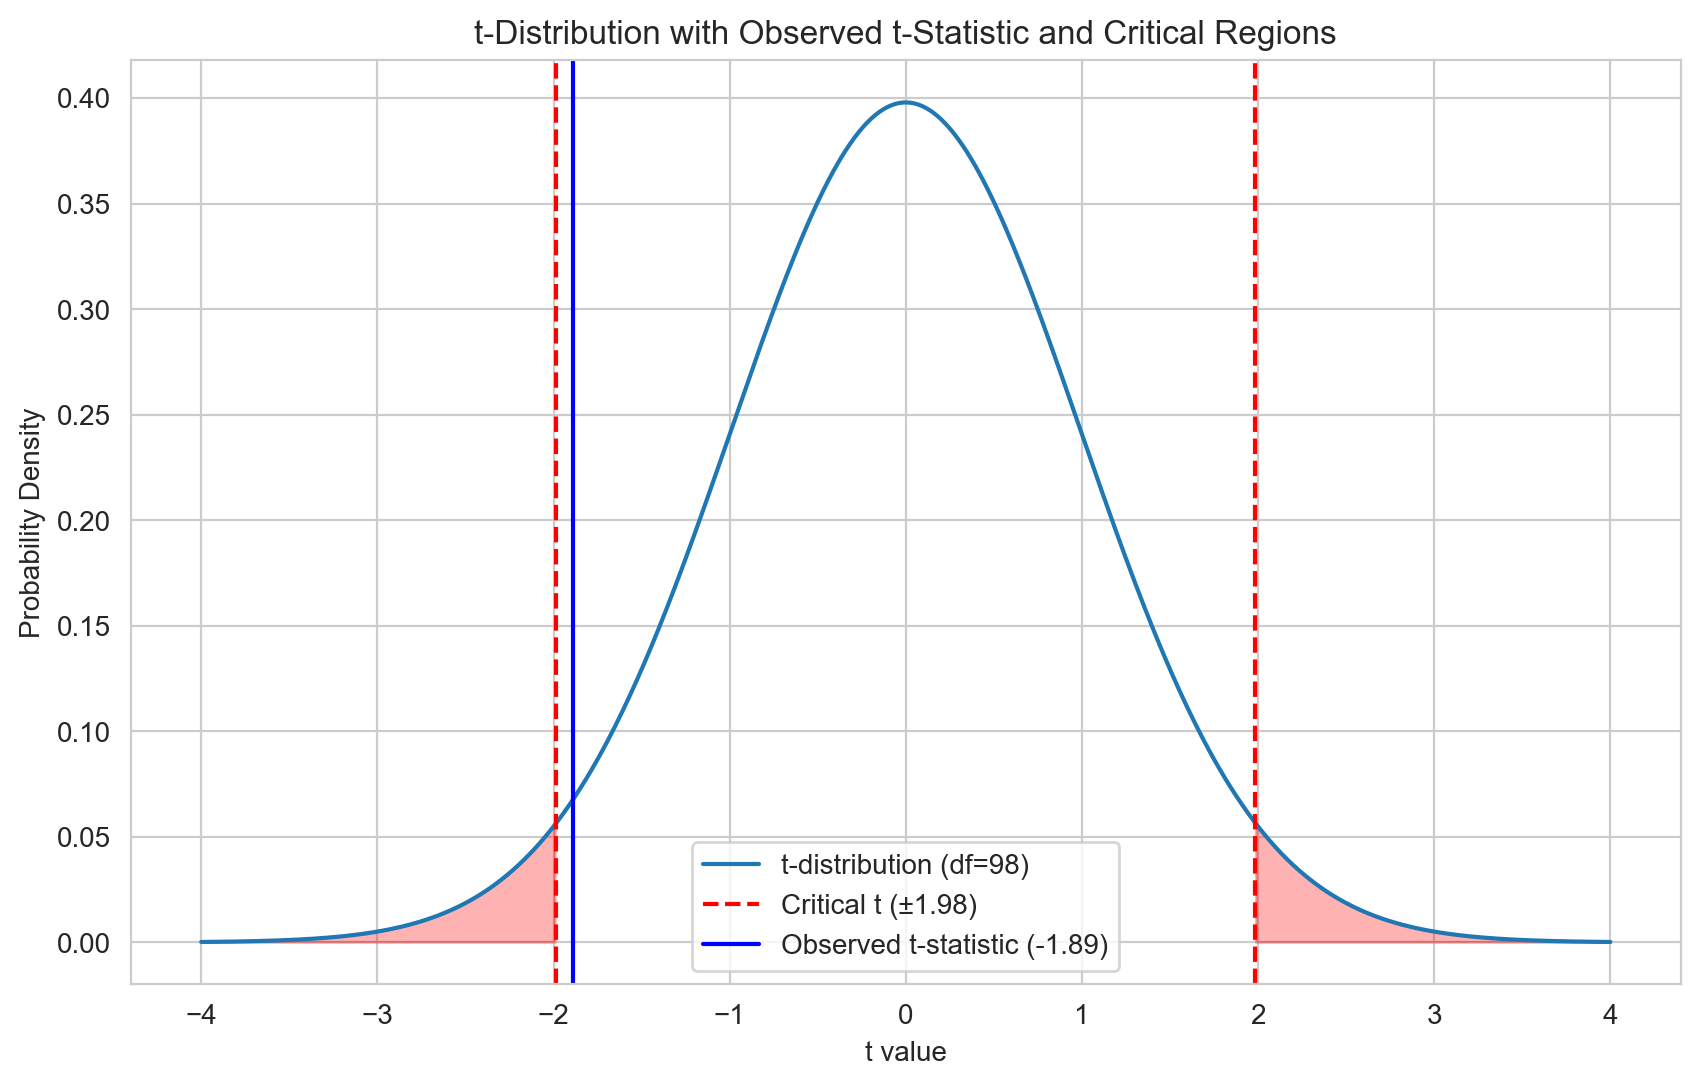

p-value: 0.06150424067253035


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def visualize_t(t_stat, n_control, n_experimental, alpha=0.05):
    """
    Visualize the t-statistic and p-value on the t-distribution.

    Parameters
    ----------
    t_stat : float
        The calculated t-statistic
    n_control : int
        The sample size of the control group
    n_experimental : int
        The sample size of the experimental group
    alpha : float, optional
        The significance level (default is 0.05)
    """
    # Degrees of freedom
    df = n_control + n_experimental - 2

    # Generate points on the x axis between -4 and 4
    x = np.linspace(-4, 4, 1000)

    # Use stats.t.pdf to get values on the probability density function for the t-distribution
    y = stats.t.pdf(x, df)

    # Initialize a matplotlib figure
    plt.figure(figsize=(10, 6))

    # Plot the t-distribution
    plt.plot(x, y, label='t-distribution (df={})'.format(df))

    # Draw two-sided boundary for critical t
    critical_t = stats.t.ppf(1 - alpha/2, df)
    plt.axvline(critical_t, color='red', linestyle='--', label='Critical t (±{:.2f})'.format(critical_t))
    plt.axvline(-critical_t, color='red', linestyle='--')

    # Shade the critical regions
    plt.fill_between(x, 0, y, where=(x >= critical_t) | (x <= -critical_t), color='red', alpha=0.3)

    # Plot the observed t-statistic
    plt.axvline(t_stat, color='blue', linestyle='-', label='Observed t-statistic ({:.2f})'.format(t_stat))

    # Calculate the p-value
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

    # Add labels and legend
    plt.title('t-Distribution with Observed t-Statistic and Critical Regions')
    plt.xlabel('t value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

    # Print the p-value
    print(f"p-value: {p_value}")

# Sample sizes
n_control = len(control)
n_experimental = len(experimental)

# Visualize the t-statistic and p-value
visualize_t(t_stat, n_control, n_experimental)


Now that you have defined your boundaries for significance, you can simply calculate the p-value by calculating the total area under curve using `stats.t.cdf()`. 

Given a t-value and the degrees of freedom, you can use the "survival function", `sf` of `scipy.stats.t` (aka the complementary CDF) to compute the one-sided p-value. For the two-sided p-value, just double the one-sided p-value.

In [10]:
## Calculate p_value
# Lower tail comulative density function returns area under the lower tail curve
lower_tail = stats.t.cdf(-1.89, (50+50-2), 0, 1)
# Upper tail comulative density function returns area under upper tail curve
upper_tail = 1. - stats.t.cdf(1.89, (50+50-2), 0, 1)

p_value = lower_tail+upper_tail
print(p_value)

0.061713104303855494


To verify these results, you can use SciPy's functions to calculate the p_value in a one liner. 

In [11]:
import numpy as np
import scipy.stats as stats

# Sample data
experimental = np.array([83, 100, 123, 75, 130, 77, 78, 87, 116, 116, 141, 93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97, 95, 104, 141, 80, 110, 136, 134, 142, 135, 111, 83, 86,
                         116, 86, 117, 87, 143, 104, 107, 86, 88, 124, 76])

control = np.array([166, 165, 120, 94, 104, 166, 98, 85, 97, 87, 114, 100, 152,
                    87, 152, 102, 82, 80, 84, 109, 98, 154, 135, 164, 137, 128,
                    122, 146, 86, 146, 85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169, 87, 97, 167, 89, 155])

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(experimental, control)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: -1.8915462966190273
p-value: 0.061504240672530394


## Summary
In this lesson, you ran hypothesis testing using frequentists methods with t-values and p-values. You saw how a two sample t-test can be applied to contexts where the population and sample mean are known and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of the steps and also how to perform these functions in python. You also used built-in SciPy functions to calculate test statistics and p-value as a way to verify the manual calculations performed. 